# Video Games Sales - Exploratory Analysis

This is my final project for the course [Data Analysis with Python: Zero to Pandas](zerotopandas.com). Here I will perform an exploratory analysis and make visualizations of a [Videogame Sales Dataset](https://www.kaggle.com/datasets/sidtwr/videogames-sales-dataset) extracted form the website Kaggle.

This dataset contains entries about several thousand games released from the 80's until 2016, and includes information including release year, platform, publisher, developer, global and regional sales; and users and critics scores. 

My goal is to explore the dataset and get useful insights about genres, platforms, critics and sales. Also, I will try to make some cool plots!

### How to run the code

This is an executable [*Jupyter notebook*](https://jupyter.org) hosted on [Jovian.ml](https://www.jovian.ml), a platform for sharing data science projects. You can run and experiment with the code in a couple of ways: *using free online resources* (recommended) or *on your own computer*.

#### Option 1: Running using free online resources (1-click, recommended)

The easiest way to start executing this notebook is to click the "Run" button at the top of this page, and select "Run on Binder". This will run the notebook on [mybinder.org](https://mybinder.org), a free online service for running Jupyter notebooks. You can also select "Run on Colab" or "Run on Kaggle".


#### Option 2: Running on your computer locally

1. Install Conda by [following these instructions](https://conda.io/projects/conda/en/latest/user-guide/install/index.html). Add Conda binaries to your system `PATH`, so you can use the `conda` command on your terminal.

2. Create a Conda environment and install the required libraries by running these commands on the terminal:

```
conda create -n zerotopandas -y python=3.8 
conda activate zerotopandas
pip install jovian jupyter numpy pandas matplotlib seaborn opendatasets --upgrade
```

3. Press the "Clone" button above to copy the command for downloading the notebook, and run it on the terminal. This will create a new directory and download the notebook. The command will look something like this:

```
jovian clone notebook-owner/notebook-id
```



4. Enter the newly created directory using `cd directory-name` and start the Jupyter notebook.

```
jupyter notebook
```

You can now access Jupyter's web interface by clicking the link that shows up on the terminal or by visiting http://localhost:8888 on your browser. Click on the notebook file (it has a `.ipynb` extension) to open it.


## Downloading the Dataset

I will use the [videogame sales dataset](https://www.kaggle.com/datasets/sidtwr/videogames-sales-dataset) that has been mentioned above.

First, we have to install the OpenDatasets library from Jovian, so we can download the files directly from Kaggle.

In [1]:
!pip install jovian opendatasets --upgrade --quiet


[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Then we download the data from the url, and list the files within the dataset (in this case, there is more than one csv file).

In [2]:
dataset_url = 'https://www.kaggle.com/datasets/sidtwr/videogames-sales-dataset' 

In [3]:
import opendatasets as od
od.download(dataset_url)

Skipping, found downloaded files in ".\videogames-sales-dataset" (use force=True to force download)


The dataset has been downloaded and extracted. The three files are now inside a subfolder.

In [4]:
data_dir = './videogames-sales-dataset'

In [5]:
import os
os.listdir(data_dir)

['PS4_GamesSales.csv',
 'Video_Games_Sales_as_at_22_Dec_2016.csv',
 'XboxOne_GameSales.csv']

Let us save and upload our work to Jovian before continuing.

In [6]:
project_name = "video-game-sales-exploratory-analysis" # change this (use lowercase letters and hyphens only)

In [7]:
!pip install jovian --upgrade -q
!pip install numpy --upgrade -q


[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
import jovian

<IPython.core.display.Javascript object>

In [9]:
jovian.commit(project=project_name, filename='video-game-sales-exploratory-analysis.ipynb')

<IPython.core.display.Javascript object>

[jovian] Updating notebook "matiascarbone/video-game-sales-exploratory-analysis" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/matiascarbone/video-game-sales-exploratory-analysis


'https://jovian.ai/matiascarbone/video-game-sales-exploratory-analysis'

## Data Preparation and Cleaning

First, we will read each CSV file and store inside an object. 

The PS4 and XBOX datasets contain redundant data, but we will read them anyway and store them in dataframes in case they are useful later on (or if we wanted to make comparison between the two flagship consoles).



In [10]:
import pandas as pd
import numpy as np

In [11]:
#Added encoding='latin-1' because otherwise I got "UnicodeDecodeError: 'utf-8' codec can't decode byte at position n".

game_df = pd.read_csv('videogames-sales-dataset\Video_Games_Sales_as_at_22_Dec_2016.csv', encoding='latin-1')

#I will also create secondary dataframes with console-specific data, because they might be useful later.
ps4_df = pd.read_csv('videogames-sales-dataset\PS4_GamesSales.csv', encoding='latin-1')
xbox_df = pd.read_csv('videogames-sales-dataset\XboxOne_GameSales.csv', encoding='latin-1')

Let's see what the main dataframe looks like...

In [12]:
game_df.head(10)


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,Nintendo,E
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,NaN,NaN,NaN,NaN,NaN,NaN


Looking at the non-null values, for each column, we can see there are a ton of null values in some columns. It's no problem, but we have to be aware of this and filter them out when it's necessary so we don't get any errors.

In [13]:
game_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       7590 non-null   float64
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(10), object(6)
memory usage: 2.0+ MB


In [14]:
game_df.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,7.125046,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,1.500006,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,0.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,6.400000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,7.500000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,8.200000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,9.700000,10665.000000


We see that the sales number is really low. A quick Google search confirmed that it represents millions of units. 

Also, some values are floats while they don't need to. Let's fix both issues!

In [15]:
game_df = game_df.convert_dtypes()
game_df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Global_Sales', 'Other_Sales']] *= 1000000
game_df = game_df.astype({'NA_Sales' : 'int', 'EU_Sales' : 'int', 'JP_Sales' : 'int', 'Global_Sales' : 'int', 'Other_Sales' : 'int'})

game_df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006,Sports,Nintendo,41360000,28960000,3770000,8450000,82530000,76,51,8.0,322,Nintendo,E
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29080000,3580000,6810000,770000,40240000,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15680000,12760000,3790000,3290000,35520000,82,73,8.3,709,Nintendo,E
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15610000,10930000,3280000,2950000,32770000,80,73,8.0,192,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11270000,8890000,10220000,1000000,31370000,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


## Exploratory Analysis and Visualization

On this section we will explore and start to make contact with the dataframe, visualizing and undestanding the values and ranges of the most important columns.

> We will:
> - Explore distributions of numeric columns using histograms
> - Explore relationship between columns and heatmaps


First we have to import `matplotlib.pyplot` and `seaborn`. Also, I tweaked a few settings.

In [16]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import warnings #Imported to get rid of specific warnings when showing plots
%matplotlib inline

warnings.filterwarnings('ignore')

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

sns.set_palette('tab10')
sns.set_style('whitegrid')

Let's start exploring how many different platforms and genres the dataset contains and how many games were published for each platform and genre.

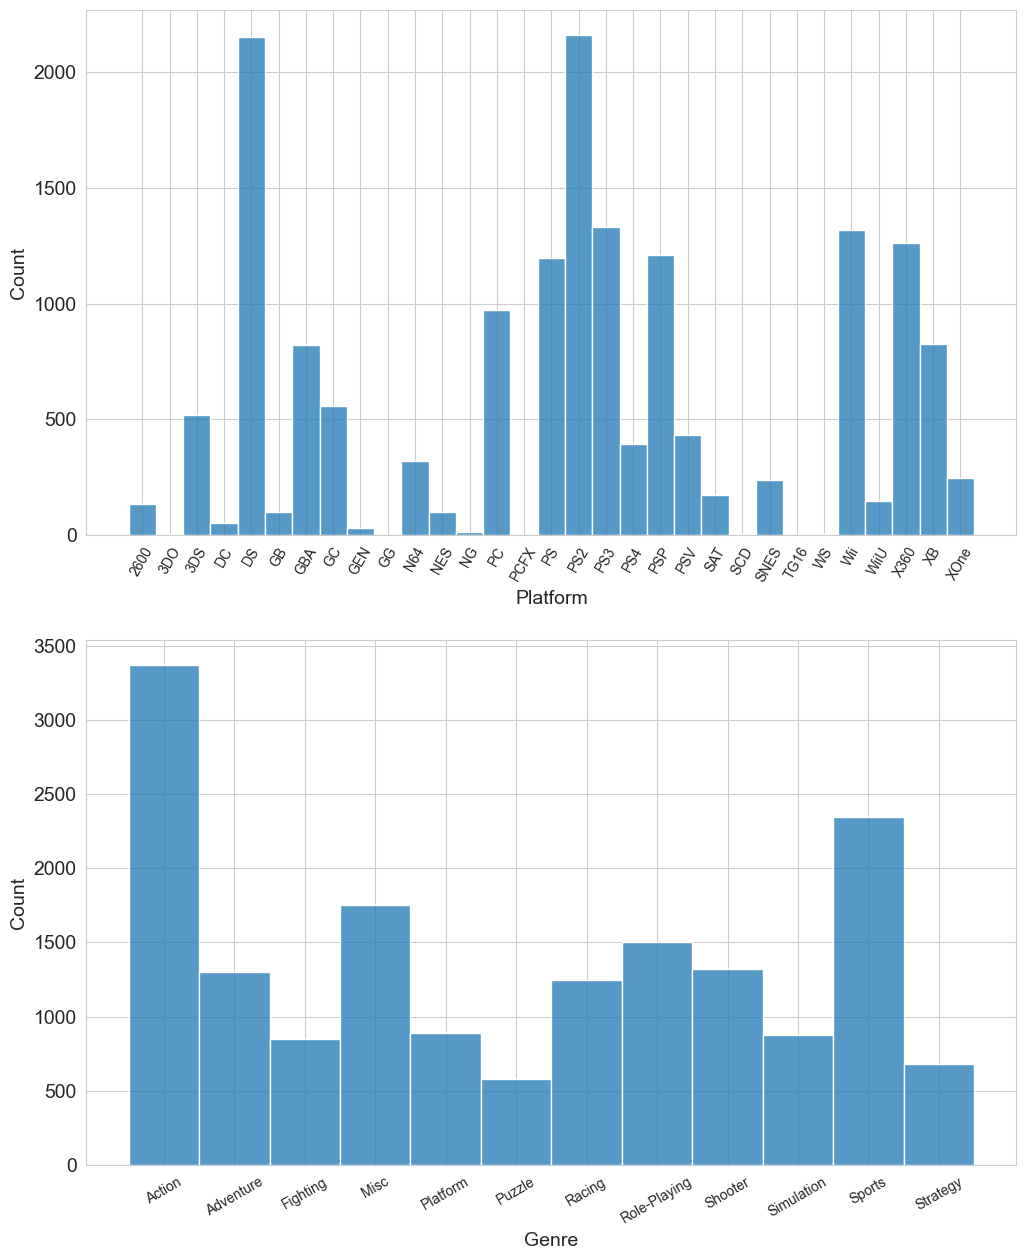

In [17]:
fig, axes = plt.subplots(2,1, figsize=(12,15))

platforms = sns.histplot(ax=axes[0], data=game_df['Platform'].sort_values())
platforms.set_xticklabels(platforms.get_xticklabels(), rotation=60, fontsize=10)

genre = sns.histplot(ax=axes[1], data=game_df['Genre'].sort_values())
genre.set_xticklabels(genre.get_xticklabels(), rotation=30, fontsize=10)


plt.show()


We can also see how many releases took place each year. Interestly, there was a peak between 2007 and 2011, and then the release number decreased.

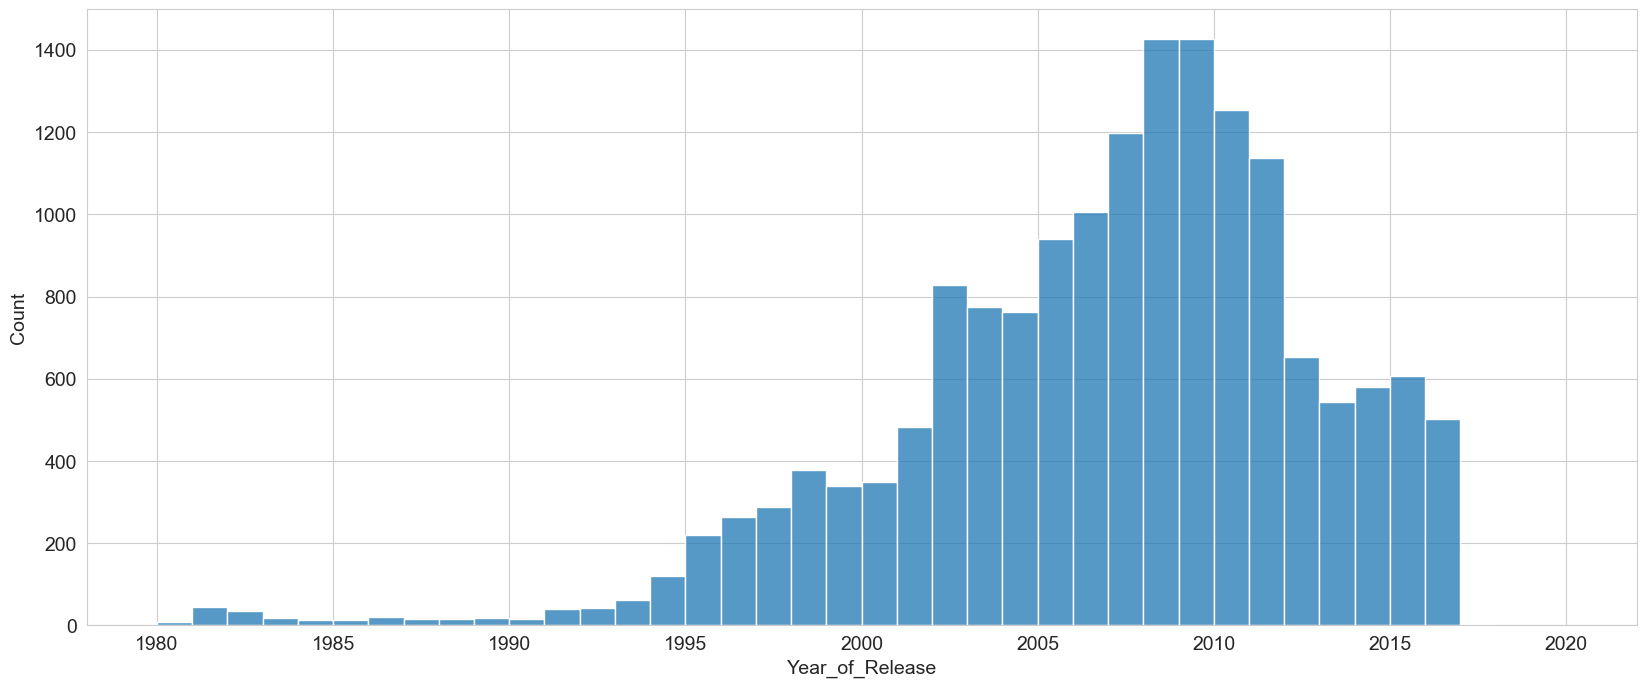

In [18]:
fig = plt.subplots(figsize=(20,8))
sns.histplot(data=game_df, x='Year_of_Release', bins=2020-1980)
plt.show()

It would be interesting to plot a heatmap that shows sales distribution between region and genre.

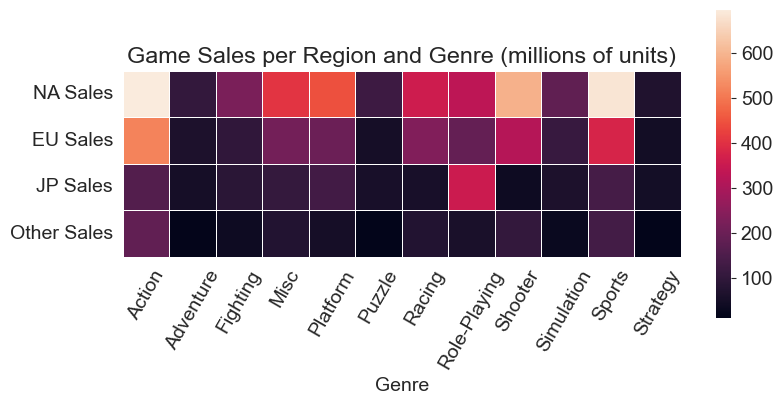

In [19]:
genre_region = game_df.groupby('Genre').sum() 
genre_region /= 1000000
genre_region.columns = genre_region.columns.str.replace('_', ' ')
genre_region = genre_region.iloc[:, 1:5].transpose()

sns.heatmap(data=genre_region, 
            square=True, 
            robust=True,
            linewidths=0.5,
            cbar_kws={'shrink':0.8})

plt.xticks(rotation=60)
plt.title('Game Sales per Region and Genre (millions of units)')
plt.show()

>We can see the most popular genres in each region are:
> - NA: Action, Sports, Shooters and 
> - EU: Action, Sports and Shooters
> - JP: Role-Playing

Let's draw a barplot showing publisher sales per genre.

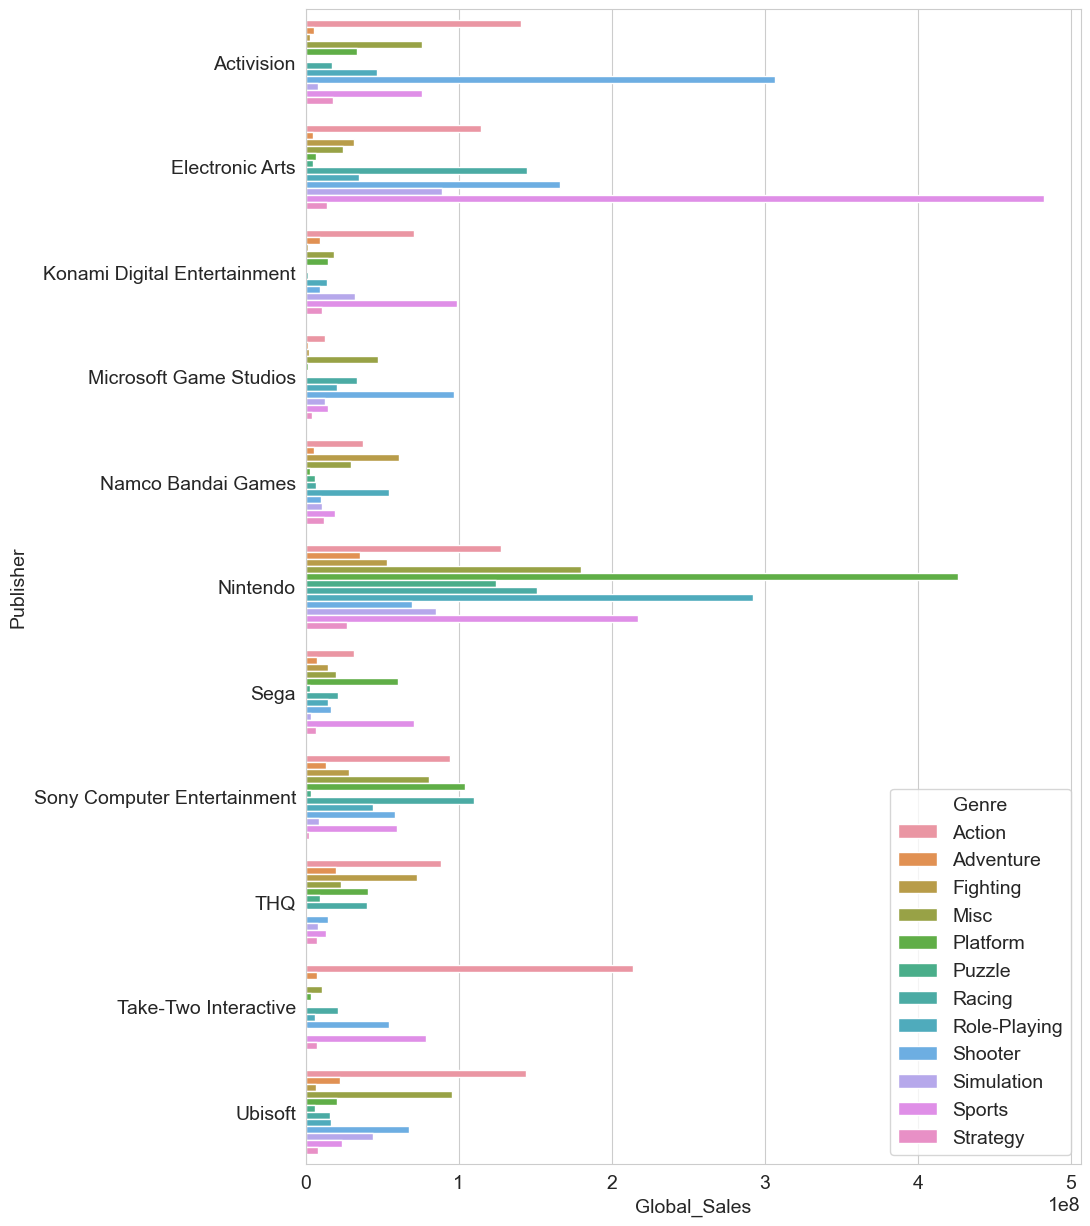

In [20]:
biggest_publishers = game_df.groupby('Publisher').sum().sort_values('Global_Sales', ascending=False).head(11).index


publisher_genre = game_df.set_index('Publisher').loc[biggest_publishers].groupby(['Publisher', 'Genre']).sum().reset_index()[['Publisher', 'Genre', 'Global_Sales']]

fig = plt.subplots(figsize=(10, 15))
sns.barplot(data=publisher_genre, y='Publisher', x='Global_Sales', hue='Genre', orient='h')
plt.show()


## Asking and Answering Questions


#### Q1: What is the evolution of scores from critics and users over time?


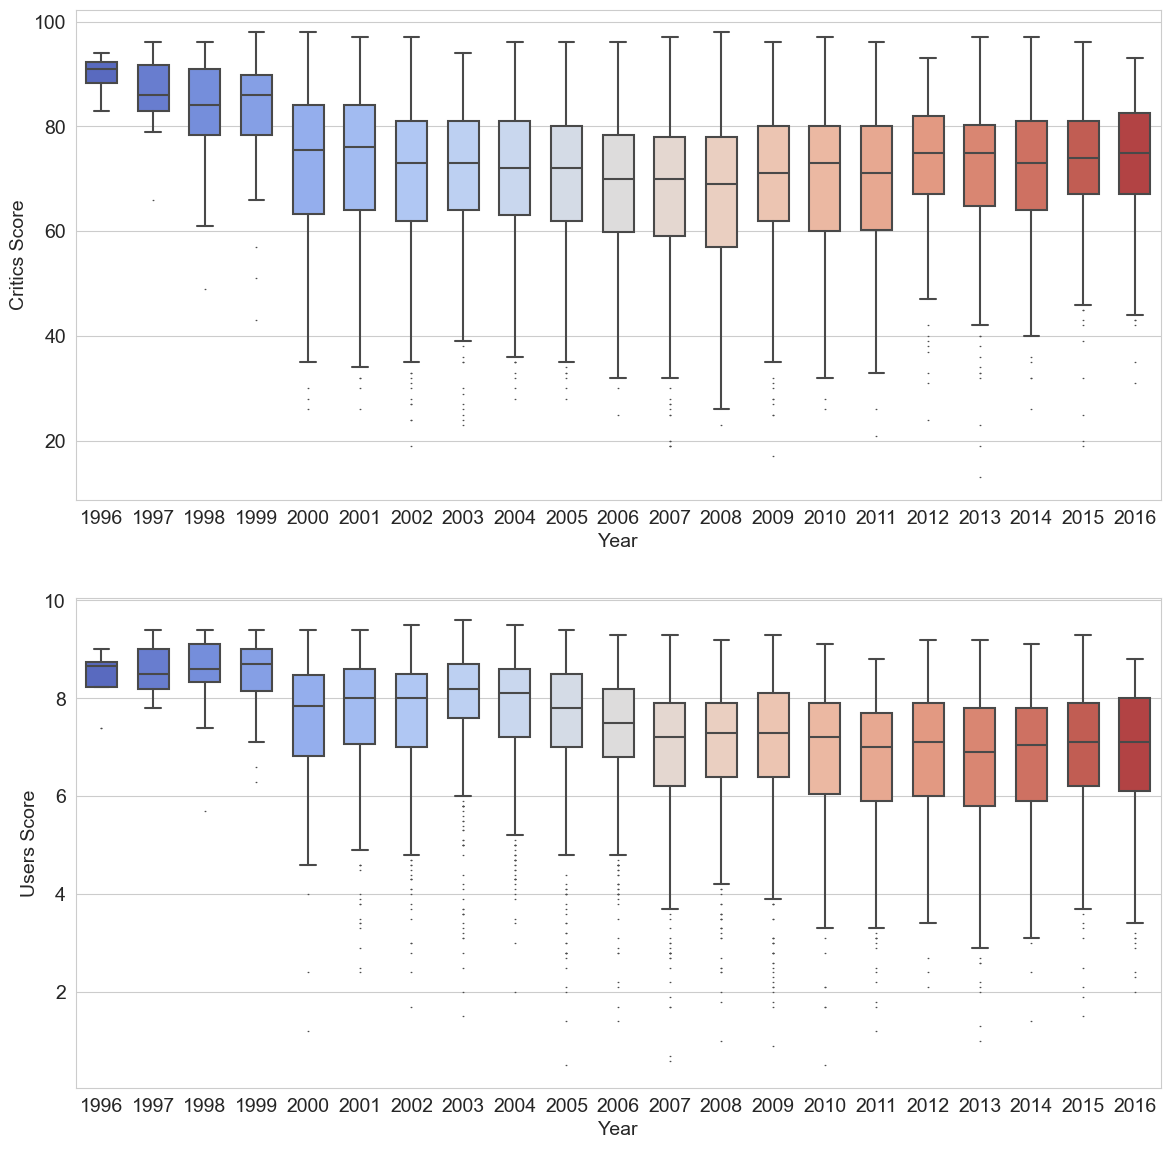

In [21]:
df = game_df[['Year_of_Release', 'Critic_Score', 'User_Score']].dropna()
df = df[df['Year_of_Release'] >= 1996]


fig, axes = plt.subplots(2, 1, figsize=(14, 14))

critics = sns.boxplot(ax=axes[0],
            data=df, 
            x='Year_of_Release', 
            y='Critic_Score',
            palette='coolwarm',
            width=0.6,
            fliersize= 0.3)

users = sns.boxplot(ax=axes[1], 
            data=df, 
            x='Year_of_Release', 
            y='User_Score',
            palette='coolwarm',
            width=0.6,
            fliersize= 0.3)

critics.set(xlabel='Year', ylabel='Critics Score')
users.set(xlabel='Year', ylabel='Users Score')

plt.show()

#### Q2: What was the number of sales per region for each year?

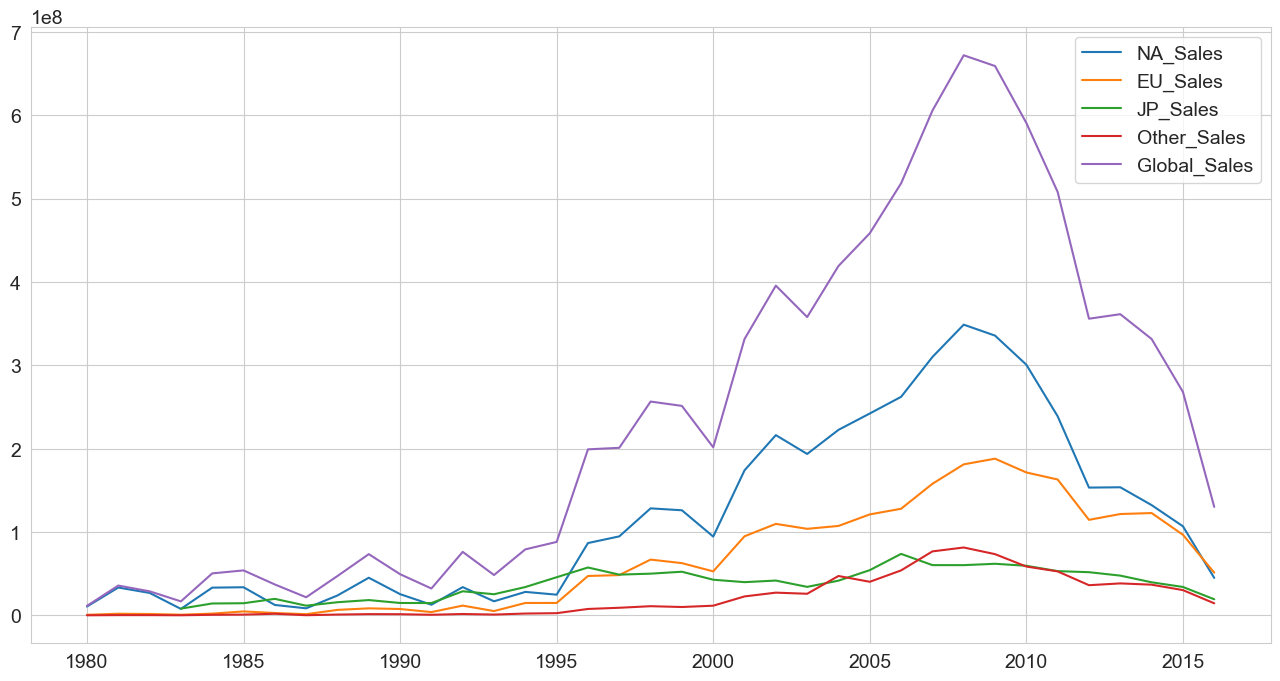

In [22]:
region_year = game_df.groupby('Year_of_Release').sum().iloc[:-2, :5].replace(0, np.nan)

fig, axes= plt.subplots(figsize=(16,8))
plt.plot(region_year)
plt.legend(region_year.columns)
plt.show()

#### Q3: What was the lifespan of Sony vs Microsoft consoles?

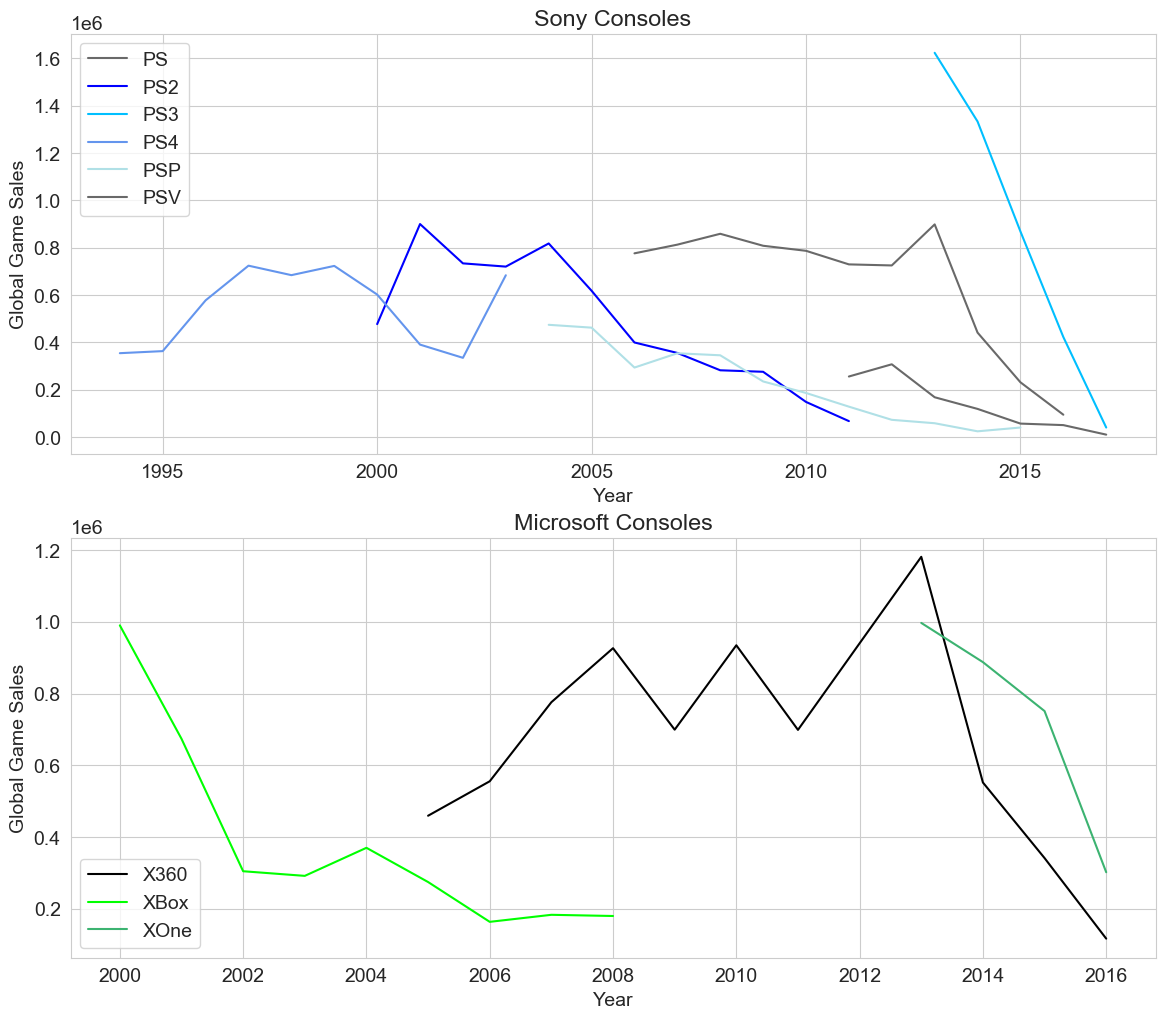

In [23]:
sony = ['PS', 'PS2', 'PS3', 'PS4', 'PSP', 'PSV']
sony_mask = game_df['Platform'].isin(sony)

microsoft_mask = game_df['Platform'].isin(['XB', 'X360', 'XOne'])

fig, axes = plt.subplots(2, 1, figsize=(14, 12))

s = sns.lineplot(data=game_df[sony_mask], 
             x='Year_of_Release', 
             y='Global_Sales', 
             hue='Platform', 
             ci=None, 
             legend=False, 
             palette=["dimgrey", "blue", "deepskyblue", "cornflowerblue", 'powderblue'],
             ax=axes[0])

s.legend(loc='upper left', labels=sony)
s.set_xlabel('Year')
s.set_ylabel('Global Game Sales')
s.set_title('Sony Consoles')

m = sns.lineplot(data=game_df[microsoft_mask], 
             x='Year_of_Release', 
             y='Global_Sales', 
             hue='Platform', 
             ci=None, 
             legend=False, 
             palette=["k", "lime", "mediumseagreen"],
             ax=axes[1])

m.legend(loc='lower left', labels=['X360','XBox','XOne'])
m.set_xlabel('Year')
m.set_ylabel('Global Game Sales')
m.set_title('Microsoft Consoles')

plt.show()


#### Q4: TODO - Which were the most popular genres for the most popular consoles?

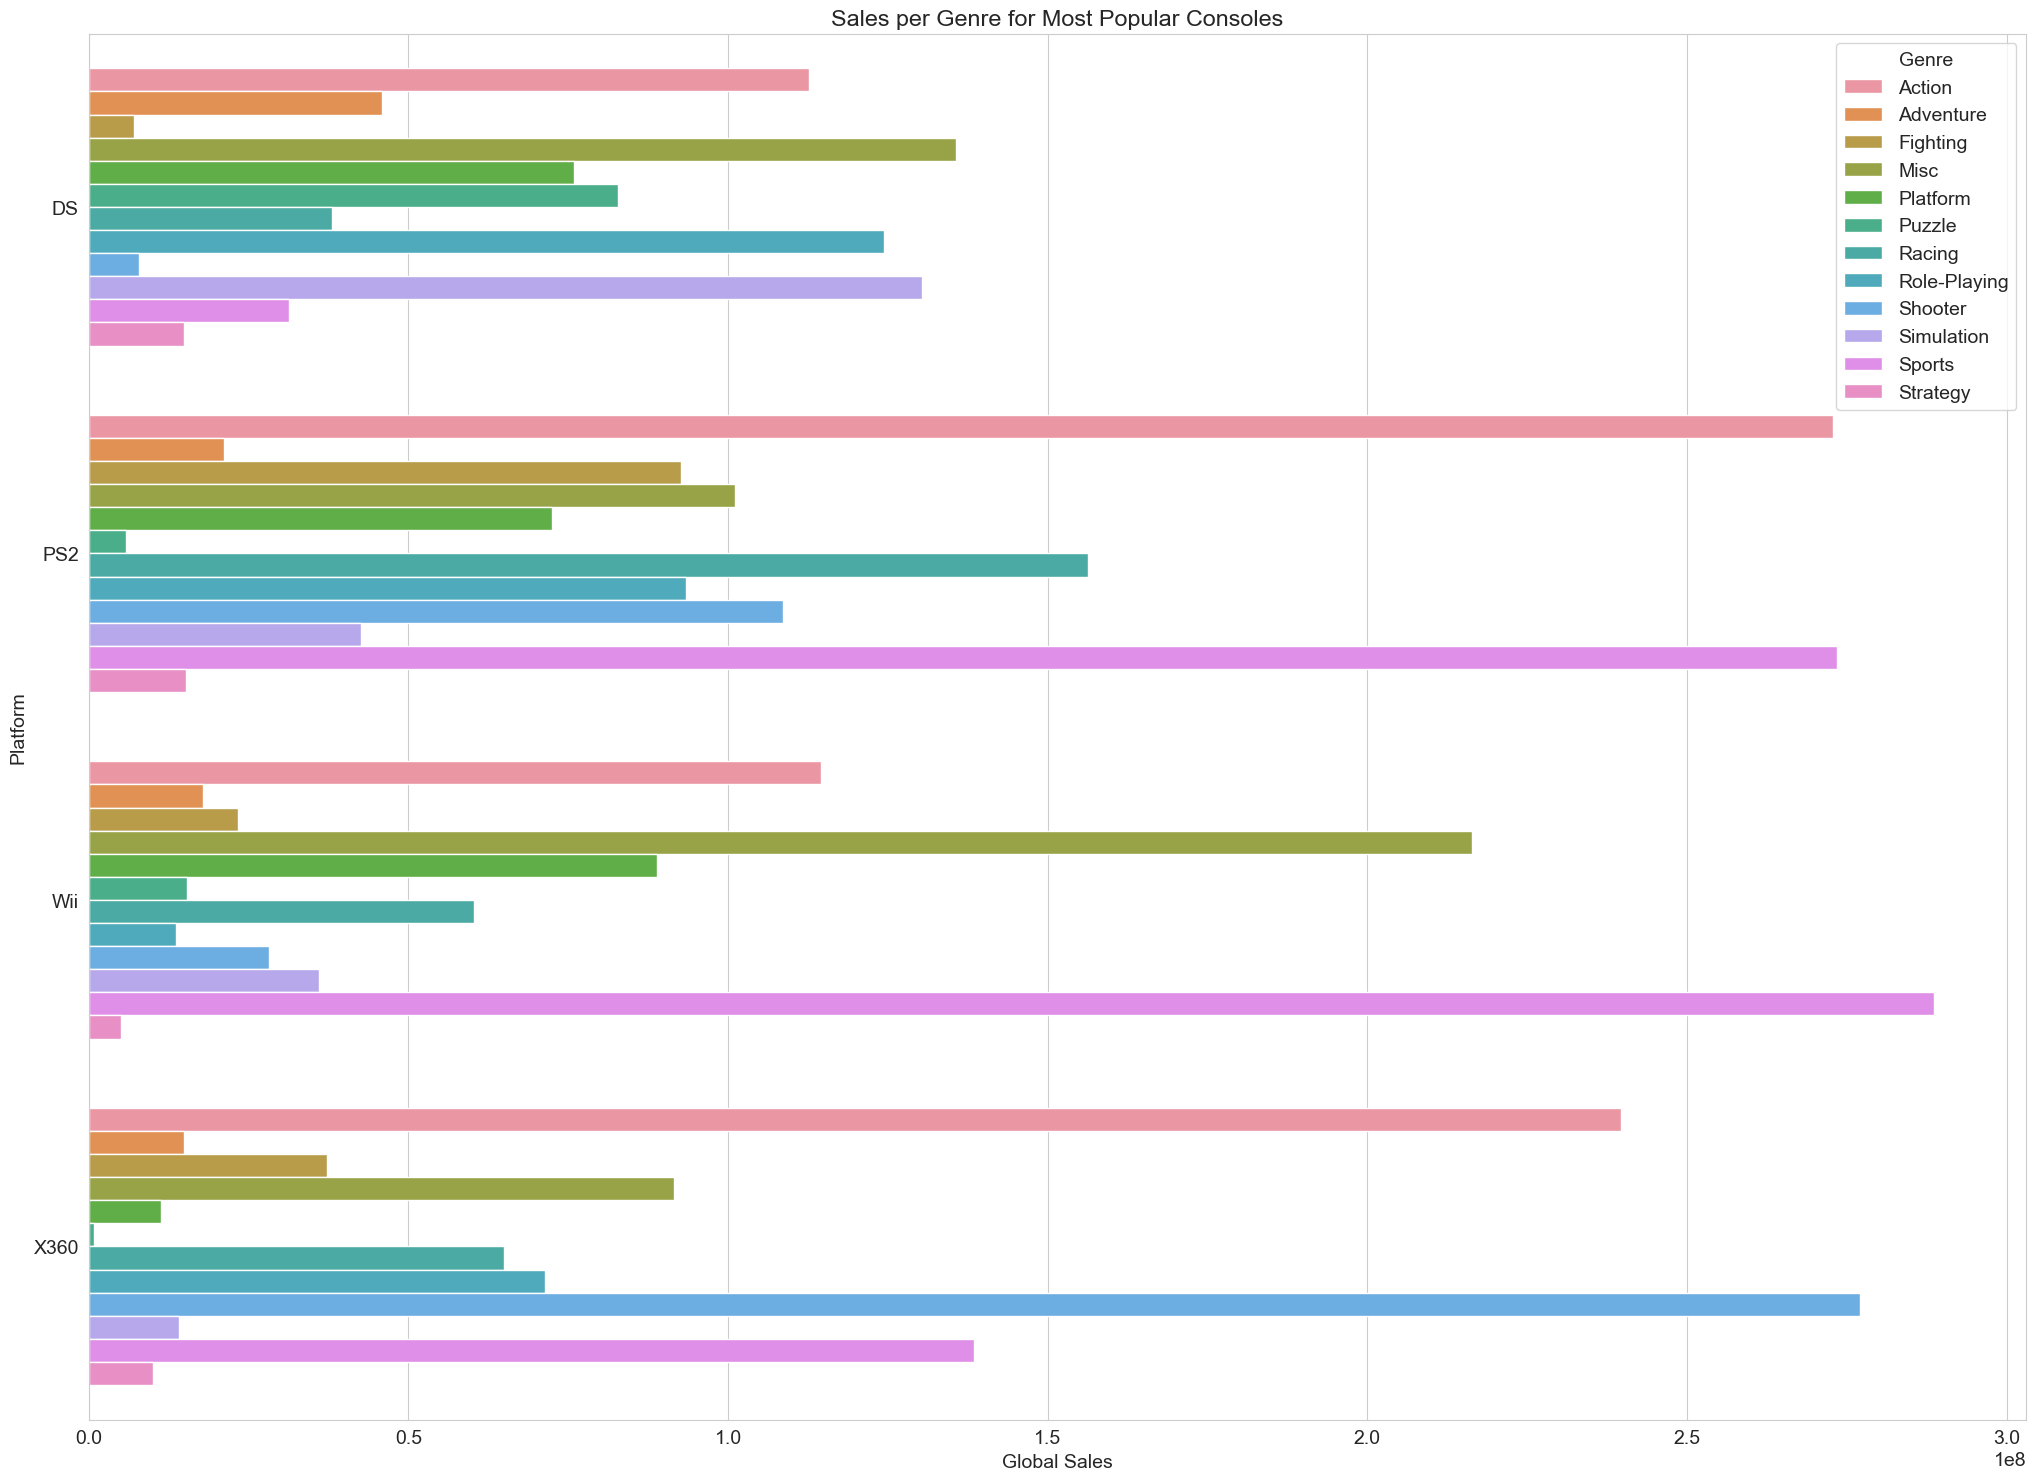

In [24]:
popular = ['PS2', 'DS', 'Wii', 'X360']
df = game_df[game_df['Platform'].isin(popular)].groupby(['Platform', 'Genre']).sum().reset_index()

plt.subplots(figsize=(25, 18))
sns.barplot(data = df, y='Platform', x='Global_Sales', hue='Genre')

plt.xlabel('Global Sales')
plt.title('Sales per Genre for Most Popular Consoles')
plt.show()

#### Q5: What was the regional sales composition of the best developers?

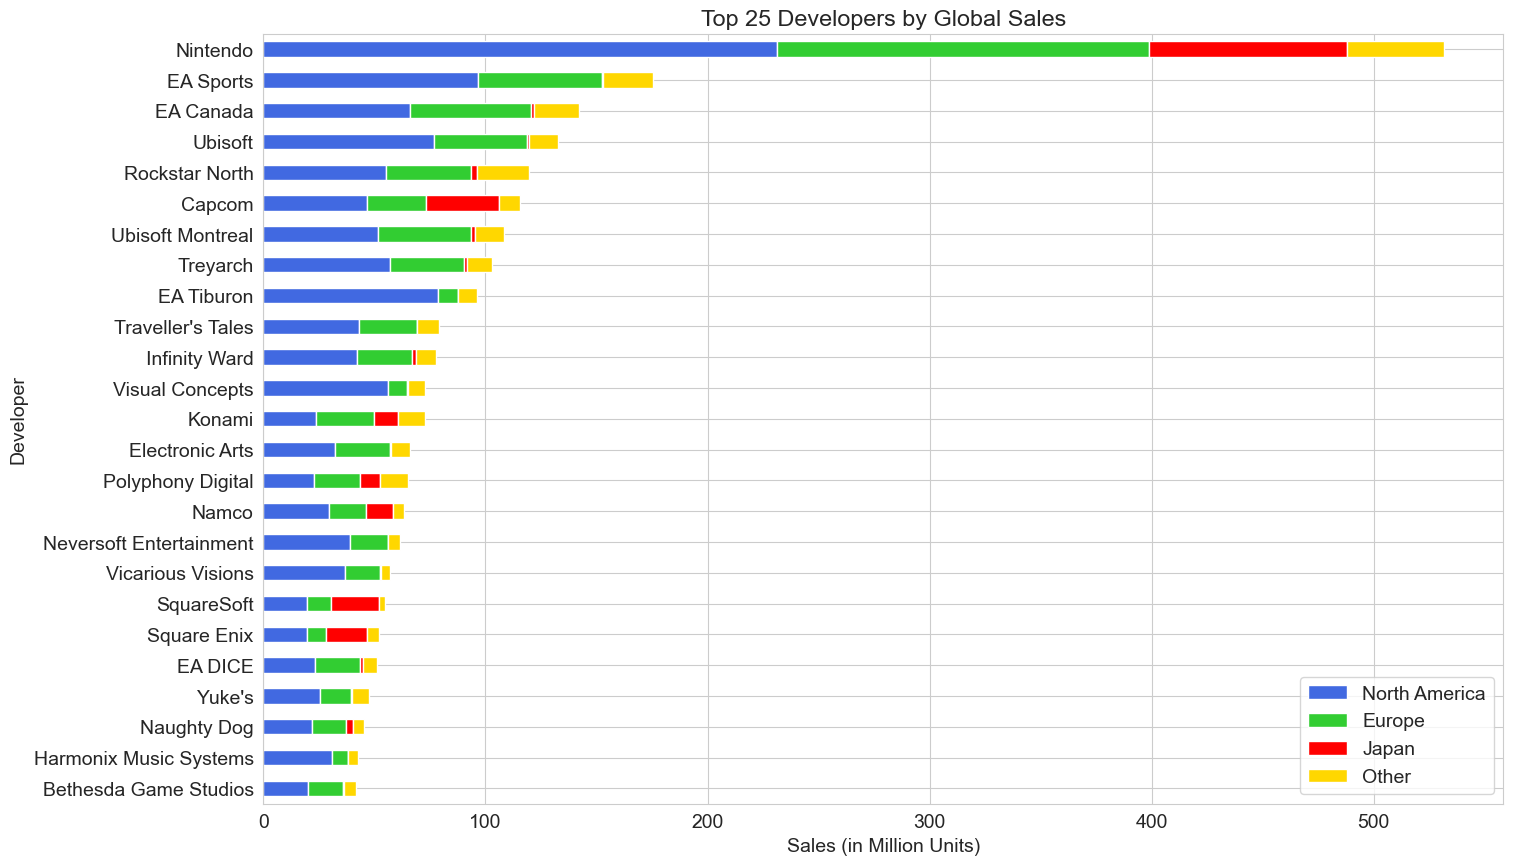

In [25]:
df = game_df.groupby('Developer').sum()[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].sort_values('Global_Sales',ascending=False).drop('Global_Sales', axis=1).head(25)
df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']] /= 1000000

df.plot(kind='barh', stacked=True, color=['royalblue', 'limegreen', 'red', 'gold'], figsize=(16,10))
plt.gca().invert_yaxis()
plt.legend(['North America', 'Europe', 'Japan', 'Other'])
plt.title('Top 25 Developers by Global Sales')
plt.xlabel('Sales (in Million Units)')
plt.show()

## Future Work

Still a work in progess. I had to limit the questions and exploration of all variables since I started the course very late and the deadline was close, but I have plans to expand the data exploration in the future.

In [26]:
jovian.commit(project=project_name, filename='video-game-sales-exploratory-analysis.ipynb')

<IPython.core.display.Javascript object>

[jovian] Updating notebook "matiascarbone/video-game-sales-exploratory-analysis" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/matiascarbone/video-game-sales-exploratory-analysis


'https://jovian.ai/matiascarbone/video-game-sales-exploratory-analysis'